In [1]:
from maelzel.core import *
from maelzel.scoring import logger as sclogger

cfg = getConfig()
# cfg['quant.debug'] = False
# sclogger.setLevel('DEBUG')

‹4C 4E 1♩ offset=0.5› 1/2 1/2 1/2
4D:1♩:gliss=4G None 3/2 3/2
4F:0.333♩ None 5/2 5/2
4F:0.667♩ None 17/6 17/6


Chain([‹4C 4E 1♩ offset=0.5›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
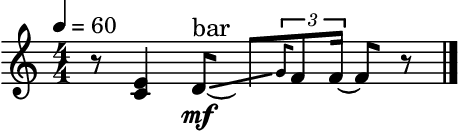

In [2]:
from maelzel.core import *
chain = Chain([
    "4C,4E:1:offset=0.5",
    "4D:1:mf:label=bar:gliss=4g",
     Chain(["4F:1/3", "4F:2/3"])
])

for ev, offset in chain.eventsWithOffset():
    print(ev, ev.offset, ev.absOffset(), offset)
chain

In [3]:
ch2 = chain.clone()
assert all(event.parent is not None for event, offset in ch2.eventsWithOffset())

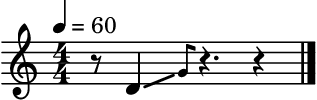

In [4]:
n = Note("4D", dur=1, offset=0.5, gliss="4G")
n.show()
# n.quantizedScore().dump()

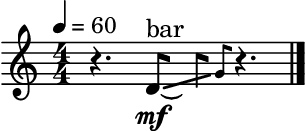

4D:1♩:gliss=4G


In [5]:
n = chain[1]
n.show()
n.dump()
# n.play(start=n.absoluteOffset())


Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, Chain([4F:0.333♩, 4F:0.667♩])])
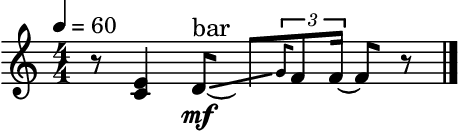

In [6]:

chain.fillGaps()
chain.dump()
chain.removeRedundantOffsets()
chain.dump()
chain

Chain([Rest:0.5♩, ‹4C 4E 1♩›, 4D:1♩:gliss=4G, 4F:0.333♩, 4F:0.667♩])
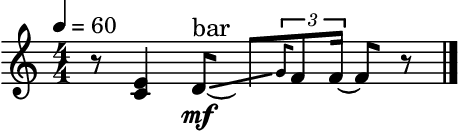

In [7]:
flat = chain.flat()
flat.removeRedundantOffsets()
flat.dump()
flat

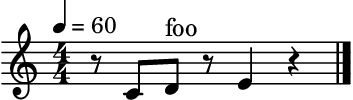

In [8]:
ch = Chain([
    '4C:0.5', 
    '4D:0.5:label=foo', 
    Chain(['4E:1:offset=0.5'])
], offset=0.5)
ch.show()


In [9]:
struct = ScoreStruct(r'''
2/4, 60
2/4, 120
3/4, 72
''')

--Csound version 7.0 (double samples) Feb 25 2025
[commit: 2d7b783a0ed4e67b6764d69cfb29edefdaea8826]
libsndfile-1.2.2
sr = 48000.0, kr = 750.000, ksmps = 64
0dBFS level = 1.0, A4 tuning = 440.0
audio buffered in 256 sample-frame blocks
reading 2048-byte blks of shorts from adc:Built-in Audio Analog Stereo: (RAW)
writing 512 sample blks of 64-bit floats to dac:Built-in Audio Analog Stereo:
SECTION 1:


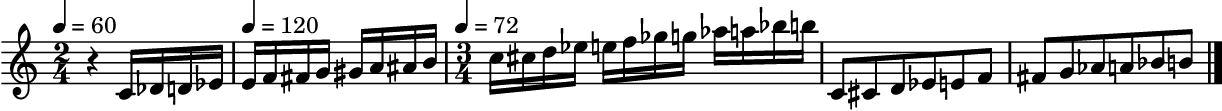

In [10]:
notes = [Note(m, 0.25) for m in range(60, 84)]
sc = Chain(notes, offset=1)
notes2 = [Note(m, 0.5) for m in range(60, 72)]
sc2 = Chain(notes2)
sc.append(sc2)
# sc.stack()
with struct:
    sc.play()
    sc.asVoice().show()


In [11]:
sc.dump()

In [12]:
with struct:
    sc.play()

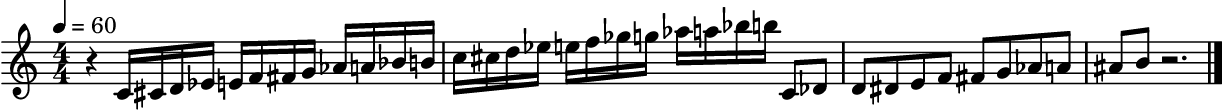

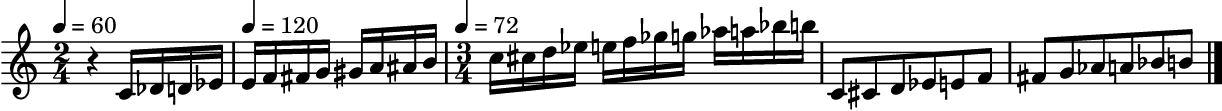

In [13]:
sc.flat().show()
with struct:
    sc.flat().show()

Score(4 voices)
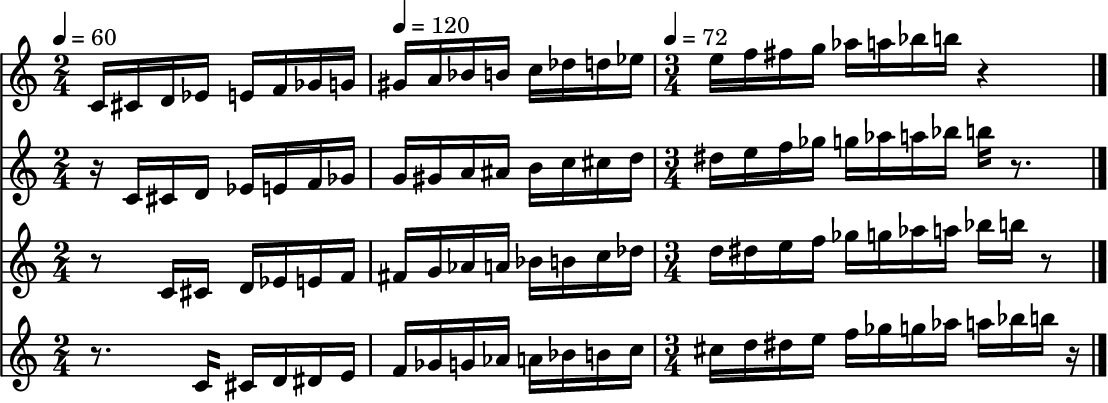

In [14]:
sco = Score(scorestruct=struct)

notes = [Note(m, 0.25) for m in range(60, 84)]
scale = Chain(notes)
sco.append(scale.asVoice())
sco.append(scale.asVoice().timeShift(0.25))
sco.append(scale.asVoice().timeShift(1/2))
sco.append(scale.asVoice().timeShift(F(3, 4)))
assert all(voice.parent is sco for voice in sco.voices)
sco

In [15]:
sco[0][0].setPlay(instr='saw', gain=0.1, position=0)
sco[0][3].setPlay(instr='saw', gain=0.1, position=1)
sco.play(position=0.5)


Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset:saw=502.0002 start=46.409 dur=0.250 p5=0 kpos=0.1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p20=60 p21=0.515178 p22=0.25 p23=60 …)
    Synth(𝍪 preset:.piano=501.0074 start=46.659 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=61 p21=0.515178 p22=0.25 p23=61 …)
    Synth(𝍪 preset:.piano=501.0075 start=46.909 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=62 p21=0.515178 p22=0.25 p23=62 …)
    Synth(𝍪 preset:saw=502.0003 start=47.159 dur=0.250 p5=1 kpos=0.1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p20=63 p21=0.515178 p22=0.25 p23=63 …)
    Synth(𝍪 preset:.piano=501.0076 start=47.409 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=64 p21=0.515178 p22=0.25 p23=64 …)
    Synth(𝍪 preset:.piano=501.0077 start=47.659 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=65 p21=0.515178 p22=0.25 p23=65 …)
    Synth(𝍪 preset:.piano=501.0078 start=47.909 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=66 p21=0.515178 p22=0.25 p23=66 …)
    Synth(𝍪 preset:.piano=501.0079 start=48.159 dur=0.250 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=67 p21=0.515178 p22=0.25 p23=67 …)
    Synth(𝍪 preset:.piano=501.008 start=48.409 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=68 p21=0.515178 p22=0.125 p23=68 …)
    Synth(𝍪 preset:.piano=501.0081 start=48.534 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=69 p21=0.515178 p22=0.125 p23=69 …)
    Synth(𝍪 preset:.piano=501.0082 start=48.659 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=70 p21=0.515178 p22=0.125 p23=70 …)
    Synth(𝍪 preset:.piano=501.0083 start=48.784 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=71 p21=0.515178 p22=0.125 p23=71 …)
    Synth(𝍪 preset:.piano=501.0084 start=48.909 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=72 p21=0.515178 p22=0.125 p23=72 …)
    Synth(𝍪 preset:.piano=501.0085 start=49.034 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=73 p21=0.515178 p22=0.125 p23=73 …)
    Synth(𝍪 preset:.piano=501.0086 start=49.159 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=74 p21=0.515178 p22=0.125 p23=74 …)
    Synth(𝍪 preset:.piano=501.0087 start=49.284 dur=0.125 p5=0.5 kpos=1 kgain=19 idataidx_=2 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=75 p21

In [16]:
v = sco.voices[2]
v.scorestruct()

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,2/4,60,,,
1,2/4,120,,,
2,3/4,72,,,
3,(3/4),,,,
4,(3/4),,,,
...,,,,,


In [17]:
sco.activeScorestruct()

Meas. Index,Timesig,Tempo (quarter note),Label,Rehearsal,Barline
0,2/4,60,,,
1,2/4,120,,,
2,3/4,72,,,
3,(3/4),,,,
4,(3/4),,,,
...,,,,,


In [18]:
sco.play(gain=0.5, sustain=0.1)

Button(description='Stop', style=ButtonStyle())

Output()

SynthGroup(n=96)
    Synth(𝍪 preset:saw=502.0004 start=74.393 dur=0.350 p5=0 kpos=0.1 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p20=60 p21=0.515178 p22=0.25 p23=60 …)
    Synth(𝍪 preset:.piano=501.0168 start=74.643 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=61 p21=0.515178 p22=0.25 p23=61 …)
    Synth(𝍪 preset:.piano=501.0169 start=74.893 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=62 p21=0.515178 p22=0.25 p23=62 …)
    Synth(𝍪 preset:saw=502.0005 start=75.143 dur=0.350 p5=1 kpos=0.1 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 klag=0 kcutoffratio=3 kfilterq=0 p20=63 p21=0.515178 p22=0.25 p23=63 …)
    Synth(𝍪 preset:.piano=501.017 start=75.393 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=64 p21=0.515178 p22=0.25 p23=64 …)
    Synth(𝍪 preset:.piano=501.0171 start=75.643 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=65 p21=0.515178 p22=0.25 p23=65 …)
    Synth(𝍪 preset:.piano=501.0172 start=75.893 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=66 p21=0.515178 p22=0.25 p23=66 …)
    Synth(𝍪 preset:.piano=501.0173 start=76.143 dur=0.350 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=67 p21=0.515178 p22=0.25 p23=67 …)
    Synth(𝍪 preset:.piano=501.0174 start=76.393 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=68 p21=0.515178 p22=0.125 p23=68 …)
    Synth(𝍪 preset:.piano=501.0175 start=76.518 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=69 p21=0.515178 p22=0.125 p23=69 …)
    Synth(𝍪 preset:.piano=501.0176 start=76.643 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=70 p21=0.515178 p22=0.125 p23=70 …)
    Synth(𝍪 preset:.piano=501.0177 start=76.768 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=71 p21=0.515178 p22=0.125 p23=71 …)
    Synth(𝍪 preset:.piano=501.0178 start=76.893 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=72 p21=0.515178 p22=0.125 p23=72 …)
    Synth(𝍪 preset:.piano=501.0179 start=77.018 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=73 p21=0.515178 p22=0.125 p23=73 …)
    Synth(𝍪 preset:.piano=501.018 start=77.143 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=-1 ivel=0 kwet=0 p20=74 p21=0.515178 p22=0.125 p23=74 …)
    Synth(𝍪 preset:.piano=501.0181 start=77.268 dur=0.225 p5=0.5 kpos=0.5 kgain=19 idataidx_=3 inumbps=3 ibplen=1 ichan=0.02 ifadein=0.02 ifadeout=0 ipchintrp_=1 ifadekind=0 ktransp=0.1 ipitchlag=

5D♯:0.25♩
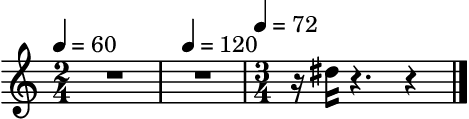

In [19]:
sco.voices[2].eventAt((2, 0.25))

In [20]:
v = sco.voices[2]
print(v.scorestruct())
v.dump()
events = v.eventsBetween((2, 0.25), (2, 0.8))
for ev in events:
    print(ev)

ScoreStruct([2/4@60, 2/4@120, 3/4@72, 3/4, 3/4])


5D♯:0.25♩
5E:0.25♩
5F:0.25♩


Chain([5D♯:0.25♩, 5E:0.25♩, 5F:0.25♩])
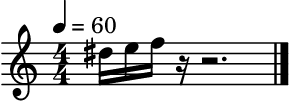

In [21]:
subch = Chain(events)
subch

In [44]:
v2 = v.copy()
print(v2.scorestruct())
v2.dump()
#v2.stack()
#v2.eventsBetween((2, 0.25), (2, 0.8))

None
